In [54]:
from scipy.optimize import fsolve
import numpy as np

times = [1, 2, 3, 4, 5, 7, 10, 30]
swaps = [0.028438, 0.03060, 0.03126, 0.03144, 0.03150, 0.03169, 0.03210, 0.03237]
dic = dict(zip(times, swaps))
forward = []
def question_a(r1):
    # F = 2 * (exp(0.5r1)-1)
    return (2 * (np.exp(0.5*r1)-1) * np.exp(-r1*0.5*1) + 2 * (np.exp(0.5*r1)-1) * np.exp(-r1*0.5*2) ) \
    / (np.exp(-r1*0.5*1) + np.exp(-r1*0.5*2)) - swaps[0]
r1 = fsolve(question_a, 0)

In [55]:
forward.append(2*(np.exp(0.5*r1)-1)) #question (a)
forward

[array([0.028438])]

In [56]:
up1 = (forward[0] * np.exp(-r1*0.5*1) + forward[0] * np.exp(-r1*0.5*2) )
down1 = np.exp(-r1*0.5*1) + np.exp(-r1*0.5*2)

In [57]:
#question (b)
def question_b(r2):
    # F = 2 * (exp(0.5r2)-1)
    return (up1 + 2 * (np.exp(0.5*r2)-1) * np.exp(-r1-r2*0.5*1) + 2 * (np.exp(0.5*r2)-1) * np.exp(-r1-r2*0.5*2) ) \
    / (down1 + np.exp(-r1-r2*0.5*1) + np.exp(-r1-r2*0.5*2)) - swaps[1]
r2 = fsolve(question_b, 0)

In [58]:
forward.append(2*(np.exp(0.5*r2)-1))
forward

[array([0.028438]), array([0.03283113])]

In [59]:
#question (c)
def all_forward():
    up = 0
    down = 0
    cumu_r = 0
    forwards = []
    for maturity, swap in dic.items():
        if maturity <= 5: gap = 1
        elif maturity == 7: gap = 2
        elif maturity == 10: gap = 3
        else: gap = 20
        def find_r(r):
            if maturity <= 5:
                return (up + 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) )) \
            / ( down + np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) ) - swap 
            else:
                good = sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
                return ( up + 2*(np.exp(0.5*r)-1)*( good ) ) \
            / ( down + good ) - swap 
        r = fsolve(find_r, 0)
        up += 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) ) if maturity <= 5 else 2*(np.exp(0.5*r)-1)*sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        down += np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) if maturity <=5 else sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        cumu_r += r
        forwards += 2*(np.exp(0.5*r)-1),
        print(r)
    return forwards
all_forward()

[0.02823772]
[0.03256457]
[0.03238174]
[0.03176235]
[0.03151051]
[0.03245506]
[0.0336439]
[0.03236779]


[array([0.028438]),
 array([0.03283113]),
 array([0.03264531]),
 array([0.0320159]),
 array([0.03176005]),
 array([0.03271983]),
 array([0.03392847]),
 array([0.03263113])]

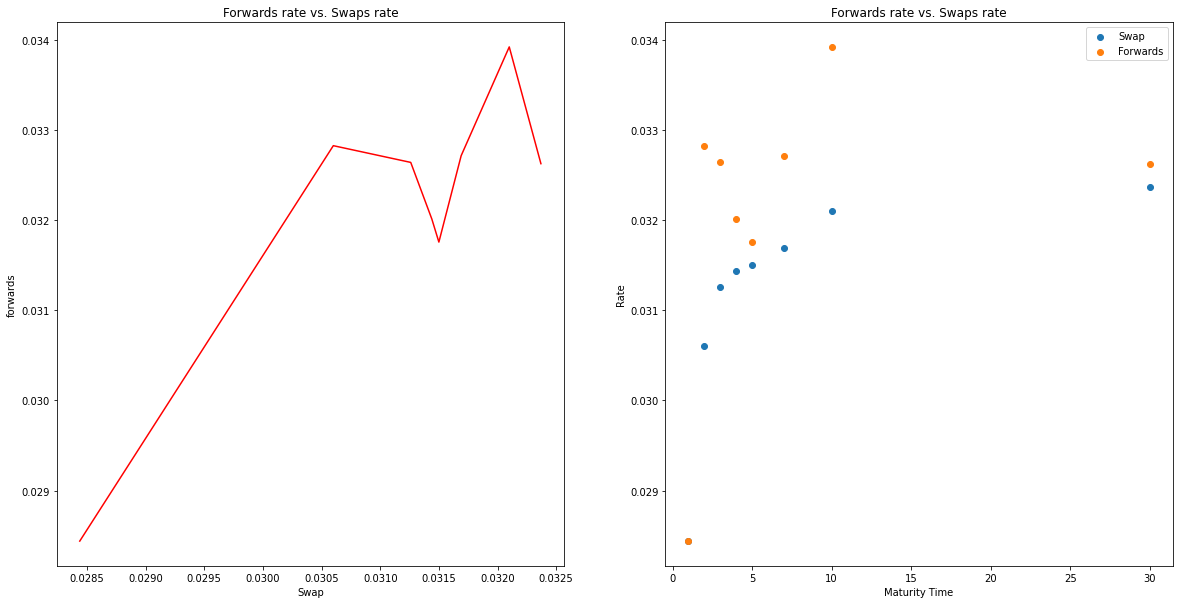

In [60]:
import matplotlib.pyplot as plt
forwards = [0.028438, 0.03283113, 0.03264531, 0.0320159, 0.03176005, 0.03271983, 0.03392847, 0.03263113]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(swaps, forwards, 'r')
ax1.set_xlabel('Swap')
ax1.set_ylabel('forwards')
ax1.set_title('Forwards rate vs. Swaps rate')

ax2.scatter(times, swaps)
ax2.scatter(times, forwards)
ax2.set_xlabel('Maturity Time')
ax2.set_ylabel('Rate')
ax2.set_title('Forwards rate vs. Swaps rate')
ax2.legend(['Swap','Forwards'])

# Comment
### Forward rates are almost higher than swap rates all the time except the first year. Forward rates change more through time than swap rates.
### As Swap rates increase, forward rates also increase in a constant slope. When swap rates go as maturity is 7, 10, 30, forward rates don't have linear relation with swap rates.

In [61]:
#question (d)
# forward rates:
delta = [1, 1, 1, 1, 1, 2, 3, 20]
bench_point = [2, 2, 2, 2, 2, 4, 6, 40]
forward_continue = [[forwards[i]]*2*delta[i] for i in range(8)]
forward_continue = sum(forward_continue,[])
#discount factors:
r_forward = [0.02823772,0.03256457,0.03238174,0.03176235,0.03151051,0.03245506,0.0336439,0.03236779]
discount, cumu = [], 0
for j in range(8):
    r = r_forward[j]
    for k in range(1, bench_point[j]+1):
        discount += np.exp(-cumu-r*0.5*k),
    cumu += r
    
#Do 15Y
def swap_rate_of_year(forward_continue, discount):
    return sum(map(lambda x,y:x*y, forward_continue, discount))/sum(discount)
swap_rate_of_year(forward_continue[:30], discount[:30])

0.03246653995432098

In [62]:
import pandas as pd
#question (e)
df = pd.DataFrame()
df['all forward'] = forward_continue
df['all discount'] = discount
df['zero rates'] = np.exp(df['all forward']) - 1
df

,all forward,all discount,zero rates
0,0.028438,0.985980,0.028846
1,0.028438,0.972157,0.028846
2,0.032831,0.956456,0.033376
3,0.032831,0.941009,0.033376
4,0.032645,0.925896,0.033184
5,0.032645,0.911026,0.033184
6,0.032016,0.896672,0.032534
7,0.032016,0.882544,0.032534
8,0.031760,0.868748,0.032270
9,0.031760,0.855168,0.032270


# Comment
Zero rates are higher than swap rates but it's not as stable as swap rates.

In [63]:
#question (f)
forward_continue = [forward+0.01 for forward in forward_continue]
change_in_swap = [swap_rate_of_year(forward_continue[:2*i], discount[:2*i]) for i in times]
np.array(change_in_swap) - swaps

# It's not directly. Swap rates do increase, but they increase less than forward rates.

In [64]:
#question (g)
bearish_swaps = [0.028438, 0.03060, 0.03126, 0.03194, 0.03250, 0.03319, 0.03460, 0.03737]
bearish_swaps

[0.028438, 0.0306, 0.03126, 0.03194, 0.0325, 0.03319, 0.0346, 0.03737]

In [65]:
#question (h)
bearish_dic = dict(zip(times, bearish_swaps))

def all_forward():
    up = 0
    down = 0
    cumu_r = 0
    forwards = []
    for maturity, swap in bearish_dic.items():
        if maturity <= 5: gap = 1
        elif maturity == 7: gap = 2
        elif maturity == 10: gap = 3
        else: gap = 20
        def find_r(r):
            if maturity <= 5:
                return (up + 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) )) \
            / ( down + np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) ) - swap 
            else:
                good = sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
                return ( up + 2*(np.exp(0.5*r)-1)*( good ) ) \
            / ( down + good ) - swap 
        r = fsolve(find_r, 0)
        up += 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) ) if maturity <= 5 else 2*(np.exp(0.5*r)-1)*sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        down += np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) if maturity <=5 else sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        cumu_r += r
        forwards += 2*(np.exp(0.5*r)-1),
    return forwards
all_forward()

[array([0.028438]),
 array([0.03283113]),
 array([0.03264531]),
 array([0.034119]),
 array([0.03493695]),
 array([0.03694902]),
 array([0.04095669]),
 array([0.04017318])]

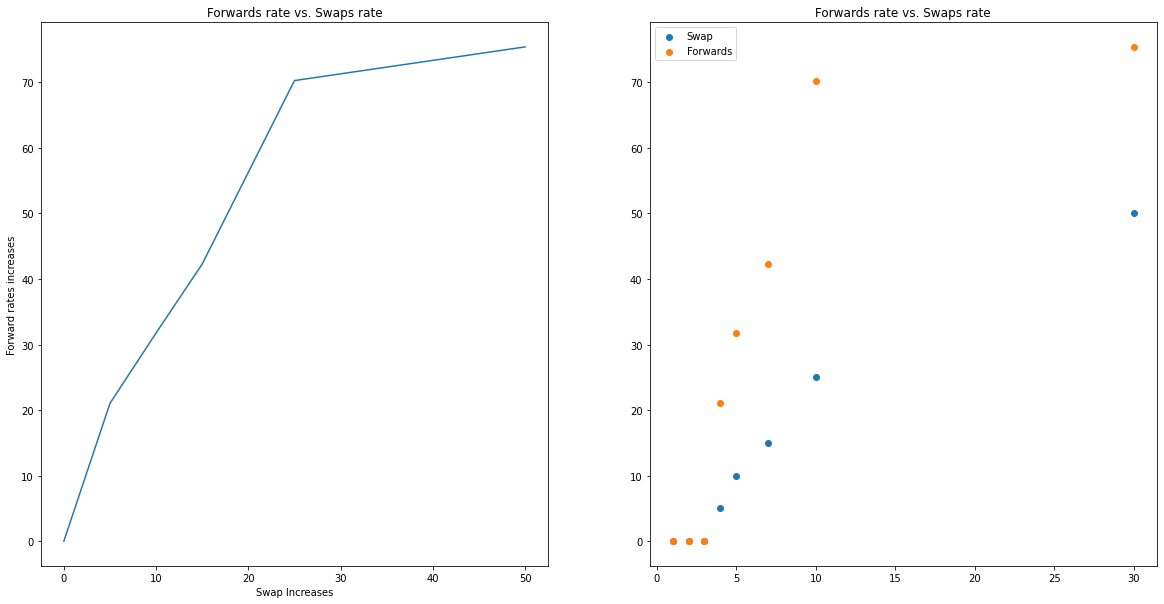

In [66]:
bearish_for = np.array([0.028438, 0.03283113, 0.03264531, 0.034119, 0.03493695, 0.03694902, 0.04095669, 0.04017318])
diff = bearish_for - forwards
fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.plot([0,0,0,5,10,15,25,50], diff * 10000)
ax1.set_xlabel('Swap Increases')
ax1.set_ylabel('Forward rates increases')
ax1.set_title('Forwards rate vs. Swaps rate')

ax2.scatter(times, [0,0,0,5,10,15,25,50])
ax2.scatter(times, diff * 10000)
ax1.set_xlabel('Swap Increases')
ax1.set_ylabel('Forward rates increases')
ax2.set_title('Forwards rate vs. Swaps rate')
ax2.legend(['Swap','Forwards'])

# Comment
### As swap rates increase, forward rates also increase and is increasing faster than swap rates. When swap rates increase large like 50 bps, the difference between these two changes is not as huge as before.

In [67]:
#question (i)
bull_swaps = [0.023438, 0.028100, 0.029760, 0.030400, 0.031000, 0.031690, 0.032100, 0.032370]
bull_swaps

[0.023438, 0.0281, 0.02976, 0.0304, 0.031, 0.03169, 0.0321, 0.03237]

In [68]:
#question (j)
bull_dic = dict(zip(times, bull_swaps))

def all_forward():
    up = 0
    down = 0
    cumu_r = 0
    forwards = []
    for maturity, swap in bull_dic.items():
        if maturity <= 5: gap = 1
        elif maturity == 7: gap = 2
        elif maturity == 10: gap = 3
        else: gap = 20
        def find_r(r):
            if maturity <= 5:
                return (up + 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) )) \
            / ( down + np.exp(-cumu_r-r*0.5) + np.exp(-cumu_r-r) ) - swap 
            else:
                good = sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
                return ( up + 2*(np.exp(0.5*r)-1)*( good ) ) \
            / ( down + good ) - swap 
        r = fsolve(find_r, 0)
        up += 2*(np.exp(0.5*r)-1)*( np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) ) if maturity <= 5 else 2*(np.exp(0.5*r)-1)*sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        down += np.exp(-cumu_r-r*0.5*gap) + np.exp(-cumu_r-r*gap) if maturity <=5 else sum( np.exp(-cumu_r-r*0.5*i) for i in range(gap))
        cumu_r += r
        forwards += 2*(np.exp(0.5*r)-1),
    return forwards
all_forward()

[array([0.023438]),
 array([0.03290536]),
 array([0.03324375]),
 array([0.03244841]),
 array([0.03360504]),
 array([0.03543941]),
 array([0.03393609]),
 array([0.03263202])]

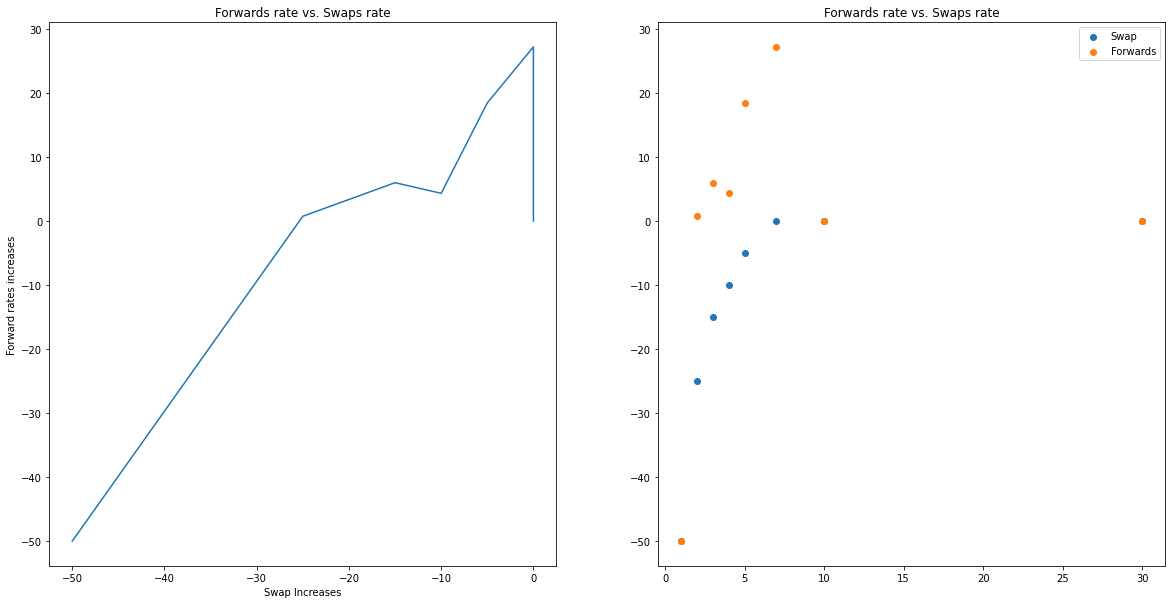

In [69]:
bull_for = np.array([0.023438, 0.03290536, 0.03324375, 0.03244841, 0.03360504, 0.03543941, 0.03393609, 0.03263202])
diff = bull_for - forwards
fig3, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.plot([-50,-25,-15,-10,-5,0,0,0], diff * 10000)
ax1.set_xlabel('Swap Increases')
ax1.set_ylabel('Forward rates increases')
ax1.set_title('Forwards rate vs. Swaps rate')

ax2.scatter(times, [-50,-25,-15,-10,-5,0,0,0])
ax2.scatter(times, diff * 10000)
ax1.set_xlabel('Swap Increases')
ax1.set_ylabel('Forward rates increases')
ax2.set_title('Forwards rate vs. Swaps rate')
ax2.legend(['Swap','Forwards'])

# Comment
### When swap rates decrease, forward rates only decrease at the beginning and then increase. Forward rates don't change in long term.